In [1]:
import pandas as pd
import numpy as np

In [10]:
# https://www.kaggle.com/datasets/googleai/pfam-seed-random-split
df_train = pd.read_csv('/goofys/projects/MAI/data/brain-genomics-public/pfam_tiny.train.csv')
# df_test = pd.read_csv('/goofys/projects/MAI/data/brain-genomics-public/pfam.test.csv')
# df_val = pd.read_csv('/goofys/projects/MAI/data/brain-genomics-public/pfam.valid.csv')

array([[<Axes: title={'center': 'len'}>]], dtype=object)

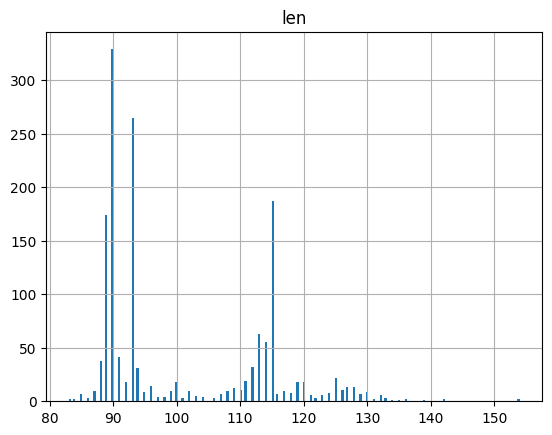

In [12]:
df_train['len'] = df_train['seq'].str.len()
df_train.hist('len', bins=200)

In [13]:
print("[pfam.train.csv] Maximum seq_len:", df_train['len'].max())
print("[pfam.train.csv] Minimum seq_len:", df_train['len'].min())
print("[pfam.train.csv] Mean seq_len:", df_train['len'].mean())
print("[pfam.train.csv] Median seq_len:", df_train['len'].median())

[pfam.train.csv] Maximum seq_len: 154
[pfam.train.csv] Minimum seq_len: 83
[pfam.train.csv] Mean seq_len: 100.70740975300824
[pfam.train.csv] Median seq_len: 93.0


In [14]:
# Clip length of AA (amino acid) sequence to e.g. 512
df_train['original'] = df_train['seq'].str.slice(0, 512)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

bow_scalar = CountVectorizer(analyzer='char')
bow_scalar.fit(df_train['original'].values)
tokens = bow_scalar.get_feature_names_out()
tokens = [t.upper() for t in tokens]

In [16]:
len(tokens)

22

In [17]:
import random 
random.seed(0)

def corrupt_sequence(seq, perc = 0.05):
    """Replace 5% of the AA tokens with random one. 

    Args:
        seq: Sequence to be corrupted.
    """
    seq = list(seq)
    for index in random.sample(range(len(seq)), k = int(perc * len(seq))):
        corrupted = random.choice([x for x in tokens if x != seq[index]])
        seq[index] = corrupted
    return ' '.join(seq)

In [18]:
df_train['corrupted'] = df_train['original'].apply(corrupt_sequence)

In [19]:
df_train['original'] = df_train['original'].str.join(' ')

In [20]:
df_train

,seq,label,len,original,corrupted
0,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...,PF02261.16,115,M L R M M M N S K I H R A T V T E A D L N Y V ...,M L R M M M N S K I H R A T V T E A D L N Y V ...
1,LFVYGTLRQGESNHNFLADSQCLGHFETPPHYALYDLGTYPAVIEG...,PF06094.12,109,L F V Y G T L R Q G E S N H N F L A D S Q C L ...,L F V Y G T L R Q G E S N H N F L A D S Q C L ...
2,PYELMVLLRPDLADDRLEAALERIRNTVVEQGGTITFEKRDTPWGR...,PF01250.17,93,P Y E L M V L L R P D L A D D R L E A A L E R ...,P Y E L M V L L R P D L X D D R L V A A L E R ...
3,YELFALAKPQLGKKAIASIMKAVASKVMEQGGVVTDIRSYGERKLA...,PF01250.17,93,Y E L F A L A K P Q L G K K A I A S I M K A V ...,Y E L F A L A K P V L G T K A I A S I M K A V ...
4,QIKLMHAKLHHLRVTQAELDYVGSITIDQALIEKVGILPLEEVNIW...,PF02261.16,116,Q I K L M H A K L H H L R V T Q A E L D Y V G ...,Q I K L M H A K L H H L R V T Q A E L D Y V G ...
...,...,...,...,...,...
1574,FQKLPAYIIDFGAWITGRKPMQVPQIQSKIIRAMNIIEFFTTRDFI...,PF03015.19,94,F Q K L P A Y I I D F G A W I T G R K P M Q V ...,F Q K V P A Y I I D F G A W I T G E K P M Q V ...
1575,LYETMYIIRPDLGEETVDQVINQYQSLLRDQGAEDVQTQHRGKRRL...,PF01250.17,89,L Y E T M Y I I R P D L G E E T V D Q V I N Q ...,L Y E T M Y I I R P D L G E E T V D Q V I N Q ...
1576,KYEVMYIVKPTLDEEARTAVIAKLHAILTDNGATIDEVNEWGLREL...,PF01250.17,90,K Y E V M Y I V K P T L D E E A R T A V I A K ...,K Y N V M Y I V K P T L D E E A R T A V I A K ...
1577,AYEILYIIRPDMDEEATNALVDRLSGLAASNGGQNVTVDKWGKRRL...,PF01250.17,90,A Y E I L Y I I R P D M D E E A T N A L V D R ...,A Y E I L Y I I R P D M D E E A T N A L V D R ...


In [43]:
# Save [original, corrupted, label] to .csv
df_train[['original', 'corrupted', 'label']].to_csv('pfam_tiny_1579.train.csv', index=False)

In [23]:
ds_raw = pd.read_csv("pfam.train.csv")

In [24]:
ds_mini = ds_raw.groupby('label', as_index=False).apply(lambda s: s.sample(min(len(s), 10)))

In [25]:
ds_mini[['original', 'corrupted', 'label']].to_csv('pfam_mini.train.csv', index=False)

In [7]:
# ds_raw = pd.read_csv("pfam.train.csv")
# tiny = pd.read_csv("pfam_tiny.train.csv")
# tiny
df_train

,seq,label
0,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...,PF02261.16
1,LFVYGTLRQGESNHNFLADSQCLGHFETPPHYALYDLGTYPAVIEG...,PF06094.12
2,PYELMVLLRPDLADDRLEAALERIRNTVVEQGGTITFEKRDTPWGR...,PF01250.17
3,YELFALAKPQLGKKAIASIMKAVASKVMEQGGVVTDIRSYGERKLA...,PF01250.17
4,QIKLMHAKLHHLRVTQAELDYVGSITIDQALIEKVGILPLEEVNIW...,PF02261.16
...,...,...
1574,FQKLPAYIIDFGAWITGRKPMQVPQIQSKIIRAMNIIEFFTTRDFI...,PF03015.19
1575,LYETMYIIRPDLGEETVDQVINQYQSLLRDQGAEDVQTQHRGKRRL...,PF01250.17
1576,KYEVMYIVKPTLDEEARTAVIAKLHAILTDNGATIDEVNEWGLREL...,PF01250.17
1577,AYEILYIIRPDMDEEATNALVDRLSGLAASNGGQNVTVDKWGKRRL...,PF01250.17


In [9]:
len(set(df_train['label']))

4